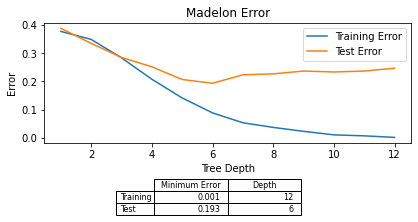

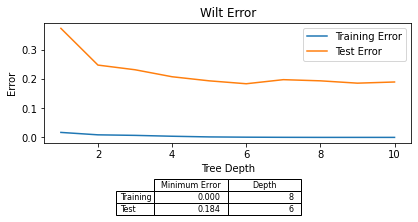

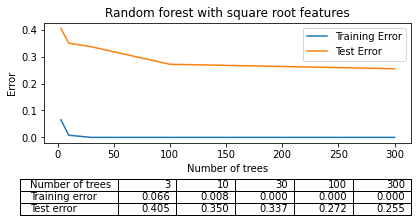

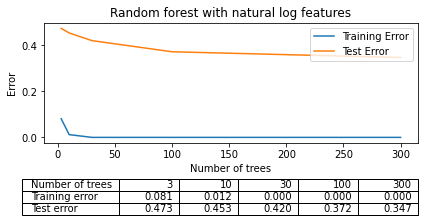

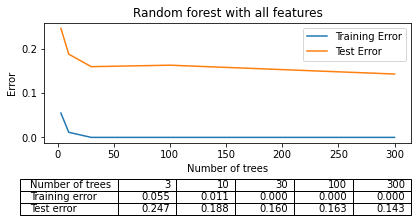

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

madelon_path = "data/MADELON/"
wilt_path = "data/wilt/"


def main():
    # Part (a) madelon decision trees
    # read in data
    madelon_training_data = np.loadtxt(madelon_path + "madelon_train.data")
    madelon_training_labels = np.loadtxt(madelon_path + "madelon_train.labels")
    madelon_test_data = np.loadtxt(madelon_path + "madelon_valid.data")
    madelon_test_labels = np.loadtxt(madelon_path + "madelon_valid.labels")
    # train the trees on the data
    madelon_trees = train_trees(madelon_training_data, madelon_training_labels, 12)
    # calculate error
    madelon_training_error = [1 - tree.score(madelon_training_data, madelon_training_labels) for tree in madelon_trees]
    madelon_test_error = [1 - tree.score(madelon_test_data, madelon_test_labels) for tree in madelon_trees]
    # graph error
    plot_tree_error(np.arange(1, 13), madelon_training_error, madelon_test_error, "Madelon Error")

    # Part (b) wilt decision trees
    # read in data
    wilt_train_data = np.loadtxt(wilt_path + "wilt_train.csv", delimiter=",")
    wilt_train_labels = np.loadtxt(wilt_path + "wilt_train.labels")
    wilt_test_data = np.loadtxt(wilt_path + "wilt_test.csv", delimiter=",")
    wilt_test_labels = np.loadtxt(wilt_path + "wilt_test.labels")
    # train the trees on the data
    wilt_trees = train_trees(wilt_train_data, wilt_train_labels, 10)
    # calculate error
    wilt_training_error = [1 - tree.score(wilt_train_data, wilt_train_labels) for tree in wilt_trees]
    wilt_test_error = [1 - tree.score(wilt_test_data, wilt_test_labels) for tree in wilt_trees]
    # graph error
    plot_tree_error(np.arange(1, 11), wilt_training_error, wilt_test_error, "Wilt Error")

    # Part (c) madelon random forest with square root features
    num_trees = (3, 10, 30, 100, 300)
    forests_sqrt = train_forests(madelon_training_data, madelon_training_labels, num_trees, "sqrt")
    # calculate error
    forest_sqrt_training_error = [1 - forest.score(madelon_training_data, madelon_training_labels) for forest in forests_sqrt]
    forest_sqrt_test_error = [1 - forest.score(madelon_test_data, madelon_test_labels) for forest in forests_sqrt]
    # graph error
    plot_forest_error(num_trees, forest_sqrt_training_error, forest_sqrt_test_error, "Random forest with square root features")

    # Part (d) madelon random forest with natural log features
    forests_ln = train_forests(madelon_training_data, madelon_training_labels, num_trees, round(math.log(500)))
    # calculate error
    forest_ln_training_error = [1 - forest.score(madelon_training_data, madelon_training_labels) for forest in forests_ln]
    forest_ln_test_error = [1 - forest.score(madelon_test_data, madelon_test_labels) for forest in forests_ln]
    # graph error
    plot_forest_error(num_trees, forest_ln_training_error, forest_ln_test_error, "Random forest with natural log features")

    # Part (e) madelon random forest with all features
    forests_all = train_forests(madelon_training_data, madelon_training_labels, num_trees, None)
    # calculate error
    forest_all_training_error = [1 - forest.score(madelon_training_data, madelon_training_labels) for forest in forests_all]
    forest_all_test_error = [1 - forest.score(madelon_test_data, madelon_test_labels) for forest in forests_all]
    # graph error
    plot_forest_error(num_trees, forest_all_training_error, forest_all_test_error, "Random forest with all features")


def train_trees(training_data, training_labels, maximum_depth):
    """uses the data and labels to train a trees of depth of i to maximum_depth
       and returns them in a list"""
    decision_tree_list = []
    # iterate from 1 to maximum_depth
    for i in range(1, maximum_depth + 1):
        decision_tree = DecisionTreeClassifier(max_depth=i)  # create new tree with depth i
        decision_tree.fit(training_data, training_labels)  # train the tree
        decision_tree_list.append(decision_tree)  # add tree to list
    return decision_tree_list


def train_forests(training_data, training_labels, num_trees, features):
    """uses the data and labels to train random forests of sizes dictated by num_trees
       and returns them in a list"""
    random_forest_list = []
    # iterate from 1 to maximum_depth
    for n in num_trees:
        # create new forest with n trees and given number of features
        random_forest = RandomForestClassifier(n_estimators=n, max_features=features)
        random_forest.fit(training_data, training_labels)  # train the tree
        random_forest_list.append(random_forest)  # add tree to list
    return random_forest_list

def plot_tree_error(domain, training_error, test_error, title):
    """Plot the tree error and create the appropriate table"""
    plot_error(domain, training_error, test_error, title, "Tree Depth")
    
    column_labels = ["Minimum Error", "Depth"]  # table column labels
    row_labels = ["Training", "Test"]  # table row labels
    min_error = min(training_error)  # minimum training error
    training_row = [f"{min_error:.3f}", domain[training_error.index(min_error)]]  # set row data (min error, depth)
    min_error = min(test_error)  # minimum testing error
    test_row = [f"{min_error:.3f}", domain[test_error.index(min_error)]]  # set row data (min error, depth)

    # create table
    plt.table(cellText=[training_row, test_row], colLabels=column_labels, rowLabels=row_labels,
              bbox=[.3, -.6, .4, .3])
    plt.tight_layout()  # set layout
    plt.show()  # show figure

def plot_forest_error(domain, training_error, test_error, title):
    """Plot the forest error and create the appropriate table"""
    plot_error(domain, training_error, test_error, title, "Number of trees")
    
    row_labels = ["Number of trees", "Training error", "Test error"]  # table row labels
    table_entries = np.asarray([training_error, test_error])
    table_entries = np.vectorize(lambda x : f"{x:.3f}")(table_entries)  # shorten to 3 decimal places
    table_entries = np.vstack([domain, table_entries])  # add domain to entries
    # create table
    plt.table(cellText=table_entries, rowLabels=row_labels, bbox=[.2, -.6, .8, .3])
    
    plt.tight_layout()  # set layout
    plt.show()  # show figure

def plot_error(domain, training_error, test_error, title, x_label):
    """graph the training error and the test error over the depth of the domain"""
    plt.gcf().canvas.set_window_title(title)  # set window title
    plt.title(title)  # set plot title
    plt.plot(domain, training_error, label="Training Error")  # plot training error
    plt.plot(domain, test_error, label="Test Error")  # plot test error
    plt.xlabel(x_label)  # set x label
    plt.ylabel("Error")  # set y label
    plt.legend(loc="upper right")  # add legend



if __name__ == "__main__":
    main()